# Setup

In [1]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Path to the folder
%cd /content/drive/MyDrive/Python - Time Series Forecasting/Modern Time Series Forecasting Techniques /Neural Prophet

/content/drive/MyDrive/Python - Time Series Forecasting/Modern Time Series Forecasting Techniques /Neural Prophet


In [3]:
# Install Neural Prophet
!pip install neuralprophet -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 60.0 MB/s eta 0:00:00


In [4]:
# Standard Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Neural Prophet library
from neuralprophet import NeuralProphet
from neuralprophet.hdays_utils import get_country_holidays

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [68]:
# Load the historical data from the CSV file
df = pd.read_csv("nyc_data.csv")
df.head()

,Date,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
0,1/1/2015,720.000885,0,0,0,3.68,41.305
1,1/2/2015,581.276773,0,0,0,4.73,131.574
2,1/3/2015,754.117039,0,0,0,7.23,162.700
3,1/4/2015,622.252774,0,0,0,10.96,160.281
4,1/5/2015,785.373319,0,0,0,6.92,51.077


# Data Prep

In [69]:
# Rename the 'Demand' column to 'y' and 'Date' column to 'ds'
df = df.rename(columns={'Demand': 'y', 'Date': 'ds'})
df.head()

,ds,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
0,1/1/2015,720.000885,0,0,0,3.68,41.305
1,1/2/2015,581.276773,0,0,0,4.73,131.574
2,1/3/2015,754.117039,0,0,0,7.23,162.700
3,1/4/2015,622.252774,0,0,0,10.96,160.281
4,1/5/2015,785.373319,0,0,0,6.92,51.077


In [70]:
# Formatting the ds variable to standard date format
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
0,2015-01-01,720.000885,0,0,0,3.68,41.305
1,2015-01-02,581.276773,0,0,0,4.73,131.574
2,2015-01-03,754.117039,0,0,0,7.23,162.700
3,2015-01-04,622.252774,0,0,0,10.96,160.281
4,2015-01-05,785.373319,0,0,0,6.92,51.077


# Get to know the data

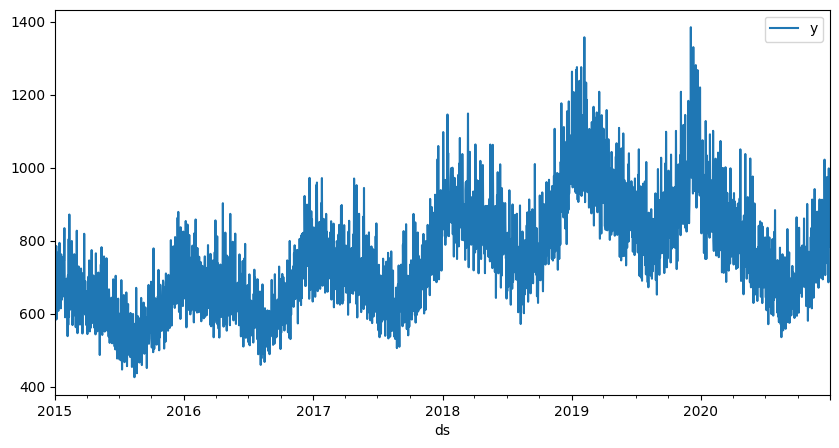

In [71]:
# plot the y variable setting the ds x axis as date
df.plot(x='ds', y='y', figsize=(10, 5))
plt.show()

# Neural Prophet Model

In [72]:
# Define the Neural Prophet Model with the updated class parameters
model = NeuralProphet(
    growth='linear',                     # Use linear growth
    yearly_seasonality='auto',           # Automatic yearly seasonality detection
    weekly_seasonality='auto',           # Automatic weekly seasonality detection
    daily_seasonality='auto',            # Automatic daily seasonality detection
    seasonality_mode='multiplicative',         # Additive seasonality mode
    future_regressors_model='linear',    # Linear model for future regressors
    n_forecasts=31,                       # Single-step forecast
    n_lags = 31,
    # batch_size = 64,
    # epochs = 10
    )

In [73]:
# Show Holidays in the US
get_country_holidays('US', years = [2018])

{datetime.date(2018, 1, 1): "New Year's Day", datetime.date(2018, 5, 28): 'Memorial Day', datetime.date(2018, 7, 4): 'Independence Day', datetime.date(2018, 9, 3): 'Labor Day', datetime.date(2018, 11, 11): 'Veterans Day', datetime.date(2018, 11, 12): 'Veterans Day (observed)', datetime.date(2018, 11, 22): 'Thanksgiving', datetime.date(2018, 12, 25): 'Christmas Day', datetime.date(2018, 1, 15): 'Martin Luther King Jr. Day', datetime.date(2018, 2, 19): "Washington's Birthday", datetime.date(2018, 10, 8): 'Columbus Day'}

In [74]:
# Add US holiday data
model.add_country_holidays(country_name='US',
                           lower_window = 7,
                           upper_window = 7)

In [75]:
# # Add custom events (e.g., elections)
# model.add_events(
#     events=['elections'],                # Add the event name
#     lower_window=0,                      # Days before the event to include
#     upper_window=0                       # Days after the event to include
# )

In [76]:
# Add event dates to the dataframe
# events_df = pd.DataFrame({
#     'ds': ['2016-11-08', '2020-11-03'],
#     'event': ['elections', 'elections']  # Event names
# })
# events_df['ds'] = pd.to_datetime(events_df['ds'])

In [77]:
# # Merge the events using create_df_with_events
# df = model.create_df_with_events(df, events_df)
# df

In [78]:
# Drop Thanksgiving variable from the df
df = df.drop(columns=['Thanksgiving', 'Easter', 'Christmas'])

In [79]:
# Add future regressors
# model.add_future_regressor(name='Easter', mode='additive')
# model.add_future_regressor(name='Christmas', mode='additive')
model.add_future_regressor(name='Temperature', mode='additive')
model.add_future_regressor(name='Marketing', mode='additive')

In [80]:
# Fit the model on the training data
model.fit(df, freq='D')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.954% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.954% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  c

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (67) is too small than the required number                     for the learning rate finder (234). The results might not be optimal.


Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.272552,0.0,312.937897,417.501068,0.271838,0.0,0
1,0.108708,0.0,158.605362,204.616730,0.108515,0.0,1
2,0.057775,0.0,104.042267,133.826859,0.057670,0.0,2
3,0.039846,0.0,82.796608,106.954834,0.039890,0.0,3
4,0.031927,0.0,73.151146,94.288536,0.031911,0.0,4
...,...,...,...,...,...,...,...
85,0.009805,0.0,40.514423,51.671749,0.009813,0.0,85
86,0.009803,0.0,40.514675,51.670681,0.009809,0.0,86
87,0.009801,0.0,40.489765,51.630569,0.009795,0.0,87
88,0.009802,0.0,40.514336,51.656559,0.009804,0.0,88


# Cross-Validation

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ds           2192 non-null   datetime64[ns]
 1   y            2192 non-null   float64       
 2   Temperature  2192 non-null   float64       
 3   Marketing    2192 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 68.6 KB


In [82]:
# Perform cross-validation
folds = model.crossvalidation_split_df(
    df,
    freq='D',                 # Daily frequency
    k=12,                     # 12 folds
    fold_pct=31 / len(df),    # Fold percentage based on forecast horizon
    fold_overlap_pct=16 / 31  # 16-day overlap between validation folds
)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.954% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.954% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib

In [83]:
for df_train, df_test in folds:
  #print(df_train)
  print(df_test)


             ds            y  Temperature  Marketing
1937 2020-04-21   782.164017        11.69    185.179
1938 2020-04-22  1050.227943         9.07     37.461
1939 2020-04-23   767.844917         7.90    126.313
1940 2020-04-24   689.605020         9.66    193.518
1941 2020-04-25   789.987300        12.30     65.161
...         ...          ...          ...        ...
2022 2020-07-15   702.331310        24.01    123.477
2023 2020-07-16   695.394152        23.33     95.627
2024 2020-07-17   625.024894        26.23     57.579
2025 2020-07-18   775.263925        29.01    135.236
2026 2020-07-19   598.664219        29.19     69.748

[90 rows x 4 columns]
             ds            y  Temperature  Marketing
1952 2020-05-06  1037.494684        10.63    148.573
1953 2020-05-07   793.124662        14.28     81.990
1954 2020-05-08   748.340747        10.46     77.096
1955 2020-05-09   779.382672         7.83     47.101
1956 2020-05-10   695.742405        13.23    183.183
...         ...        

In [84]:
METRICS = ["MAE", "RMSE"]
METRICS_VAL = ["MAE_val", "RMSE_val"]
# Prepare DataFrames for storing metrics
metrics_train = pd.DataFrame(columns=METRICS)
metrics_test = pd.DataFrame(columns=METRICS_VAL)

for df_train, df_test in folds:
    # Define the Neural Prophet Model with the updated class parameters
    model = NeuralProphet(
        growth='linear',                     # Use linear growth
        yearly_seasonality='auto',           # Automatic yearly seasonality detection
        weekly_seasonality='auto',           # Automatic weekly seasonality detection
        daily_seasonality='auto',            # Automatic daily seasonality detection
        seasonality_mode='multiplicative',         # Additive seasonality mode
        future_regressors_model='linear',    # Linear model for future regressors
        n_forecasts=31,                       # Single-step forecast
        n_lags = 31,
        # batch_size = 64,
        # epochs = 10
        )
    # Add US holiday data
    model.add_country_holidays(country_name='US')

    # Add custom events (e.g., elections)
    # model.add_events(
    #     events=['elections'],                # Add the event name
    #     lower_window=0,                      # Days before the event to include
    #     upper_window=0                       # Days after the event to include
    # )
    # Add future regressors
    # model.add_future_regressor(name='Easter', mode='additive')
    # model.add_future_regressor(name='Christmas', mode='additive')
    model.add_future_regressor(name='Temperature', mode='additive')
    model.add_future_regressor(name='Marketing', mode='additive')
    model.set_plotting_backend("plotly-static")
    train = model.fit(df=df_train, freq="D")
    test = model.test(df=df_test)
    # Use concat instead of append
    metrics_train = pd.concat([metrics_train, train[METRICS].iloc[[-1]]], ignore_index=True)
    metrics_test = pd.concat([metrics_test, test[METRICS_VAL].iloc[[-1]]], ignore_index=True)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.949% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.949% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  c

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (60) is too small than the required number                     for the learning rate finder (232). The results might not be optimal.


Finding best initial lr:   0%|          | 0/232 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.889% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │    0.01369196642190218    │
│          MAE_val          │    44.865814208984375     │
│         RMSE_val          │    55.595542907714844     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (py.warnings._showwarnmsg) - <ipython-input-84-33568d999a19>:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_train = pd.concat([metrics_train, train[METRICS].iloc[[-1]]], ignore_index=True)

  metrics_train = pd.concat([metrics_train, train[METRICS].iloc[[-1]]], ignore_index=True)

WARNING - (py.warnings._showwarnmsg) - <ipython-input-84-33568d999a19>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_test = pd.concat([metrics_test, test[METRICS_VAL].iloc[[-1]]], ignor

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (61) is too small than the required number                     for the learning rate finder (232). The results might not be optimal.


Finding best initial lr:   0%|          | 0/232 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.889% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.011408209800720215    │
│          MAE_val          │     41.83164596557617     │
│         RMSE_val          │     50.68866729736328     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.95% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.95% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  con

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (61) is too small than the required number                     for the learning rate finder (233). The results might not be optimal.


Finding best initial lr:   0%|          | 0/233 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.889% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.015188651159405708    │
│          MAE_val          │     46.94150161743164     │
│         RMSE_val          │     58.41194152832031     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.95% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.95% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  con

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (61) is too small than the required number                     for the learning rate finder (233). The results might not be optimal.


Finding best initial lr:   0%|          | 0/233 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.889% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │    0.01083639170974493    │
│          MAE_val          │     40.37671661376953     │
│         RMSE_val          │    49.322059631347656     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.951% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.951% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  c

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (62) is too small than the required number                     for the learning rate finder (233). The results might not be optimal.


Finding best initial lr:   0%|          | 0/233 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.889% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.013644087128341198    │
│          MAE_val          │     45.05127716064453     │
│         RMSE_val          │     55.32581329345703     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.951% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.951% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  c

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (62) is too small than the required number                     for the learning rate finder (233). The results might not be optimal.


Finding best initial lr:   0%|          | 0/233 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.889% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.012508935295045376    │
│          MAE_val          │     43.81887435913086     │
│         RMSE_val          │     52.93733215332031     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.951% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.951% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  c

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (63) is too small than the required number                     for the learning rate finder (233). The results might not be optimal.


Finding best initial lr:   0%|          | 0/233 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.889% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.011983471922576427    │
│          MAE_val          │     39.61443328857422     │
│         RMSE_val          │    51.748329162597656     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.952% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.952% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  c

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (63) is too small than the required number                     for the learning rate finder (233). The results might not be optimal.


Finding best initial lr:   0%|          | 0/233 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.889% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.013729534111917019    │
│          MAE_val          │    44.022125244140625     │
│         RMSE_val          │      55.312255859375      │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.952% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.952% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  c

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (64) is too small than the required number                     for the learning rate finder (233). The results might not be optimal.


Finding best initial lr:   0%|          | 0/233 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.889% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.013117277063429356    │
│          MAE_val          │     44.07990264892578     │
│         RMSE_val          │    53.989952087402344     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.952% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.952% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  c

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (64) is too small than the required number                     for the learning rate finder (233). The results might not be optimal.


Finding best initial lr:   0%|          | 0/233 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.889% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.028303397819399834    │
│          MAE_val          │     64.08627319335938     │
│         RMSE_val          │     79.2606430053711      │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.953% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.953% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  c

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (65) is too small than the required number                     for the learning rate finder (233). The results might not be optimal.


Finding best initial lr:   0%|          | 0/233 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.889% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │    0.02740401402115822    │
│          MAE_val          │    63.862754821777344     │
│         RMSE_val          │     77.61503601074219     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.953% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.953% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  c

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (65) is too small than the required number                     for the learning rate finder (233). The results might not be optimal.


Finding best initial lr:   0%|          | 0/233 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.889% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │    0.0279192253947258     │
│          MAE_val          │     60.38258743286133     │
│         RMSE_val          │     78.08963012695312     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

In [85]:
# Print the mean MAE and RMSE for Train and Test
print("Train MAE:", metrics_train["MAE"].mean())
print("Train RMSE:", metrics_train["RMSE"].mean())
print("Test MAE:", metrics_test["MAE_val"].mean())
print("Test RMSE:", metrics_test["RMSE_val"].mean())

Train MAE: 46.38075097401937
Train RMSE: 59.4747838973999
Test MAE: 48.24449221293131
Test RMSE: 59.858100255330406


# Predict the future

In [86]:
# Load the future df
future = pd.read_csv("future.csv")
future.head()

,Date,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
0,1/1/2021,NaN,0,0,0,5.00,154.221
1,1/2/2021,NaN,0,0,0,11.11,264.805
2,1/3/2021,NaN,0,0,0,3.89,115.499
3,1/4/2021,NaN,0,0,0,6.67,124.650
4,1/5/2021,NaN,0,0,0,5.56,77.968


In [87]:
# format the Date column
future['Date'] = pd.to_datetime(future['Date'])

#Change name of Date to ds
future = future.rename(columns={'Date': 'ds'})

# Change name of Demand to y
future = future.rename(columns={'Demand': 'y'})

future.head()

,ds,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
0,2021-01-01,NaN,0,0,0,5.00,154.221
1,2021-01-02,NaN,0,0,0,11.11,264.805
2,2021-01-03,NaN,0,0,0,3.89,115.499
3,2021-01-04,NaN,0,0,0,6.67,124.650
4,2021-01-05,NaN,0,0,0,5.56,77.968


In [98]:
df.tail()

,ds,y,Temperature,Marketing
2187,2020-12-27,685.915026,2.89,38.674
2188,2020-12-28,998.051170,8.83,166.712
2189,2020-12-29,847.123399,3.48,161.865
2190,2020-12-30,857.521043,5.97,179.634
2191,2020-12-31,783.891494,8.22,149.221


In [99]:
forecast = model.predict(df_complete)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.955% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.955% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralpr

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [100]:
forecast

,ds,y,yhat1,yhat2,yhat3,yhat4,yhat5,yhat6,yhat7,yhat8,...,event_Memorial Day,event_New Year's Day,event_New Year's Day (observed),event_Thanksgiving,event_Veterans Day,event_Veterans Day (observed),event_Washington's Birthday,future_regressors_additive,future_regressor_Marketing,future_regressor_Temperature
0,2015-01-01,720.000885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,581.276773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,754.117039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,622.252774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,785.373319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2021-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-45.948265,0.841332,-46.789597
2219,2021-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-30.884563,9.528123,-40.412685
2220,2021-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-11.525085,11.792883,-23.317968
2221,2021-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-31.108698,7.152747,-38.261444


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()

  ds = fcst["ds"].dt.to_pydatetime()



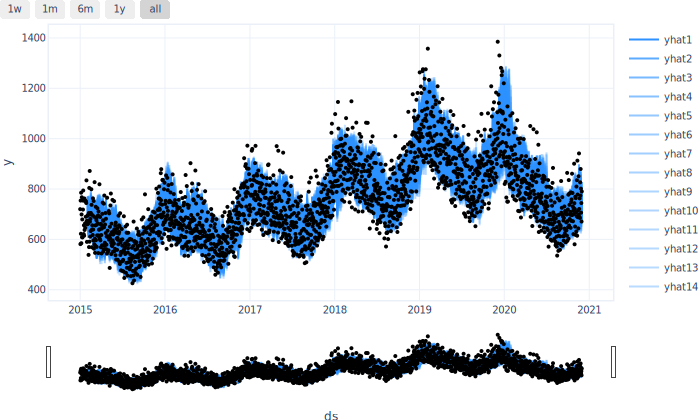

In [96]:
model.plot(forecast)

In [88]:
# Drop Christmas, Easter and Thanksgiving
future = future.drop(columns=['Thanksgiving', 'Easter', 'Christmas'])

In [89]:
# Concat future and df
df_complete = pd.concat([df, future], ignore_index=True)

In [93]:
df_complete

,ds,y,Temperature,Marketing
0,2015-01-01,720.000885,3.68,41.305
1,2015-01-02,581.276773,4.73,131.574
2,2015-01-03,754.117039,7.23,162.700
3,2015-01-04,622.252774,10.96,160.281
4,2015-01-05,785.373319,6.92,51.077
...,...,...,...,...
2218,2021-01-27,NaN,3.33,39.664
2219,2021-01-28,NaN,1.67,195.314
2220,2021-01-29,NaN,-2.78,235.894
2221,2021-01-30,NaN,1.11,152.752


In [94]:
# Extend the dataframe for future predictions
future_df = model.make_future_dataframe(
    df,  # Historical data
    periods=len(future),  # Number of future periods to predict
    n_historic_predictions=True  # Include historical predictions for comparison
)


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.954% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.954% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib

ValueError: Future values of all user specified regressors not provided